# DSO106 MachineLearn L5 Natural Language Processing

In [1]:
conda install nltk

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## import packages

In [13]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nolan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## Read in text

In [3]:
url = 'http://www.gutenberg.org/files/1184/1184-h/1184-h.htm'

In [4]:
r = requests.get(url)

In [5]:
type(r)

requests.models.Response

## Convert Text to Soup

In [6]:
html = r.text
soup = BeautifulSoup(html,"html.parser")
type(soup)

bs4.BeautifulSoup

In [7]:
soup.title.string

'The Project Gutenberg eBook of The Count of Monte Cristo, by Alexandre Dumas, pÃ¨re'

## Tokenize Data

In [9]:
text = soup.get_text()
tokenizer = RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)
tokens[:10]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'The',
 'Count',
 'of',
 'Monte',
 'Cristo']

## Remove Capitalization

In [10]:
words = []
for word in tokens:
    words.append(word.lower())

In [11]:
words[:40]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'count',
 'of',
 'monte',
 'cristo',
 'by',
 'alexandre',
 'dumas',
 'pã',
 're',
 'the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'count',
 'of',
 'monte',
 'cristo',
 'by',
 'alexandre',
 'dumas',
 'pã',
 're',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in']

## Remove Stopwords

In [14]:
stopwords = nltk.corpus.stopwords.words('english')

In [16]:
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [17]:
wordsWithoutStops = []
for word in words:
    if word not in stopwords:
        wordsWithoutStops.append(word)

In [18]:
wordsWithoutStops[:25]

['project',
 'gutenberg',
 'ebook',
 'count',
 'monte',
 'cristo',
 'alexandre',
 'dumas',
 'pã',
 'project',
 'gutenberg',
 'ebook',
 'count',
 'monte',
 'cristo',
 'alexandre',
 'dumas',
 'pã',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'united',
 'states',
 'parts']

## Count and Plot Words

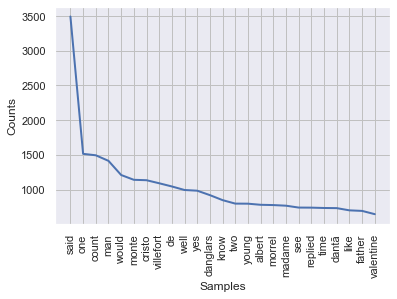

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
sns.set()
frequencyDis = nltk.FreqDist(wordsWithoutStops)
frequencyDis.plot(25)